# EXPLORATORY DATA ANALYSIS FOR WHITE WINE

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Loading the dataset
df_white = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")


In [5]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
print('shape of the dataset:', df_white.shape)

shape of the dataset: (4898, 12)


There are 4898 observations with 12 different  variables. 11 are feature variables and 1 target variable (quality)


In [7]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There are 11 variables and 1 response variable( quality) . Except quality all othere variables are of float datatype.

In [8]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the dataset.

**We can see that there are spaces in the column headers. Let's rename the columns with underscore instead of spaces.**

In [9]:
df_white.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
                         'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                         'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df_white.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
df_white.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

The quality ranges from 1 to 10 - 1 being poor and 10 being the best. We can see the dataset has values 3,4,5,6,7,8,9. We can see we do not have any observations for  1,2 and 10 in our dataset.

In [11]:
df_white.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

This shows how our observations are distributed for our quality ratings. This can be clearly visualised using the following plot. We can see that we have very few observations for quality rating 3 and 9.
Also majority of the observations are of average quality ( ratings 5 and 6)

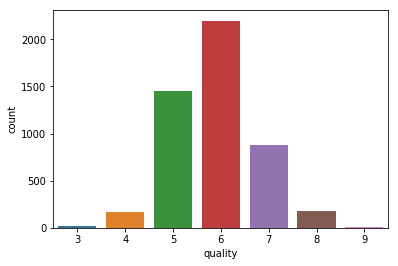

In [12]:
sns.countplot(x='quality', data=df_white)


**ANALYSING OUTLIERS IN THE DATASET**

In [13]:
df_white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


We can see that the residual_sugar, free_sulphur_dioxide , total_sulphur_dioxide have outliers ( Huge difference between 75 percentile and max value.)


The outliers for these attributes can be seen very clearly using these plots below.

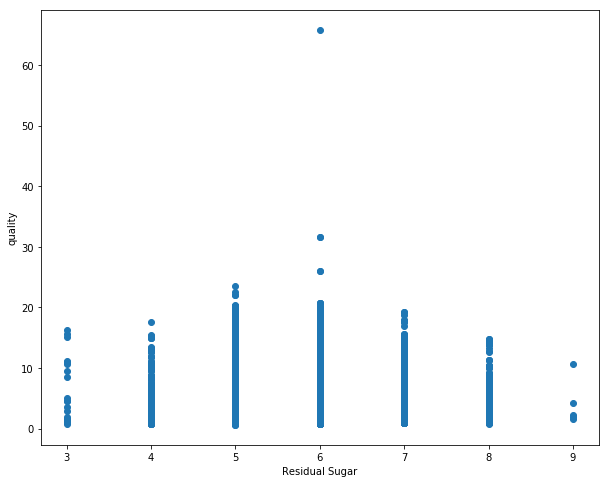

In [18]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter( df_white['quality'], df_white['residual_sugar'])
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('quality')
plt.show()

Residual Sugar - We can see that there are very few outliers and there is one outlier which is very far away. 

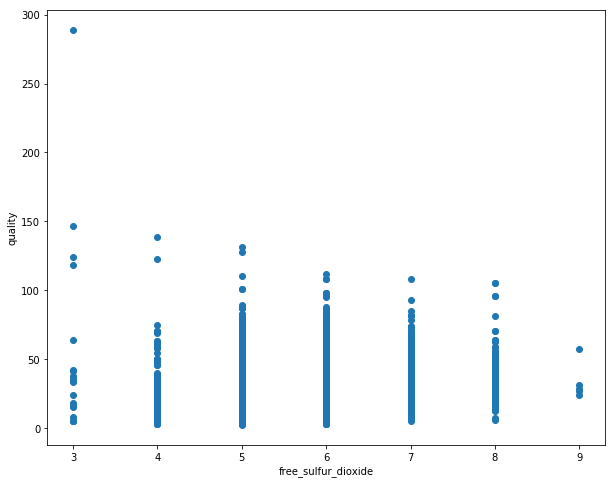

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter( df_white['quality'], df_white['free_sulfur_dioxide'])
ax.set_xlabel('free_sulfur_dioxide')
ax.set_ylabel('quality')
plt.show()

free_sulpur_dioxide - We can see that there is one value which is significantly far away for quality = 3


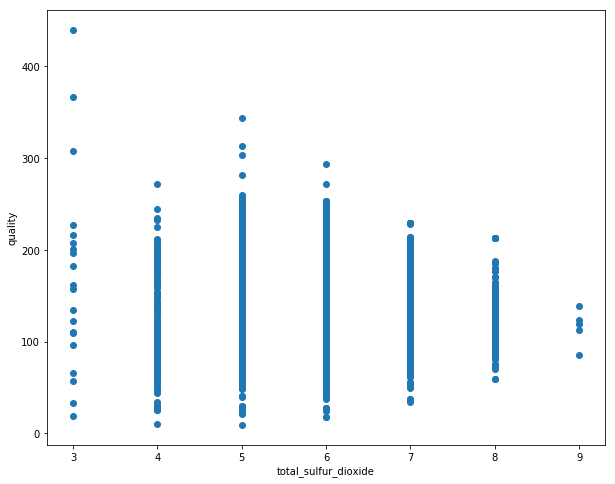

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter( df_white['quality'], df_white['total_sulfur_dioxide'])
ax.set_xlabel('total_sulfur_dioxide')
ax.set_ylabel('quality')
plt.show()

total_sulpur_dioxide - We can see that there is one value which is significantly far away for quality = 3.





# FACTORS THAT AFFECT THE QUALITY OF THE WINE


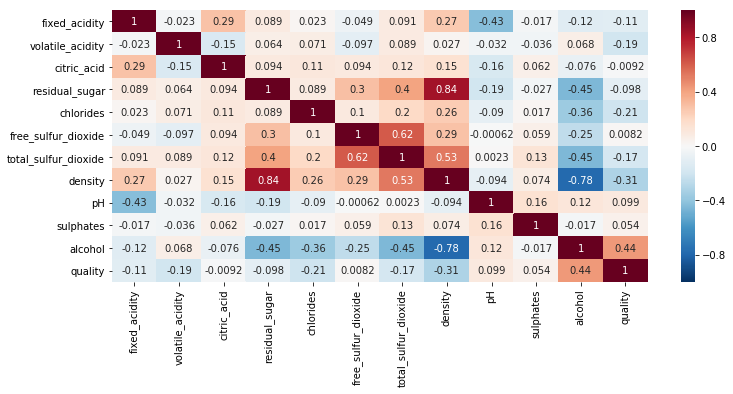

In [19]:
correlation = df_white.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")


In [20]:
correlation['quality'].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free_sulfur_dioxide     0.008158
citric_acid            -0.009209
residual_sugar         -0.097577
fixed_acidity          -0.113663
total_sulfur_dioxide   -0.174737
volatile_acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

From the above data, it is clear that alcohol(0.43) has positive correlation with quality. 
pH, sulphates and free_sulphur_dioxide also have positive correlation with quality. It can also be noted there is a strong negative correlation with density( -.31)



alcohol -  It can be seen that the alcohol content increases as the quality of wine increases. 


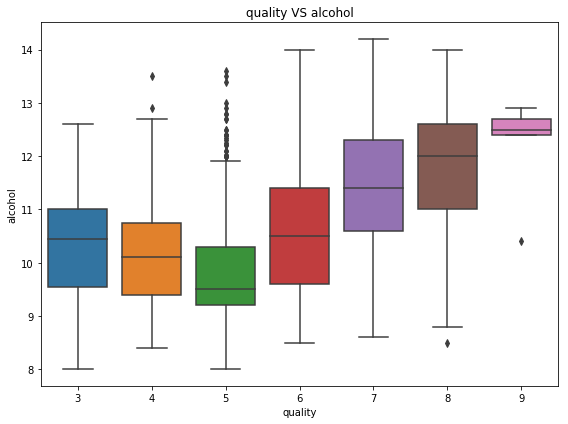

In [32]:
fig, axs = plt.subplots(ncols=1,figsize=(8,6))
sns.boxplot(x='quality', y='alcohol', data=df_white, ax=axs)
plt.title('quality VS alcohol')
plt.tight_layout()
plt.show()


density - We can see that the density of alcohol decreases as the qulaity increases. However the change is very small.

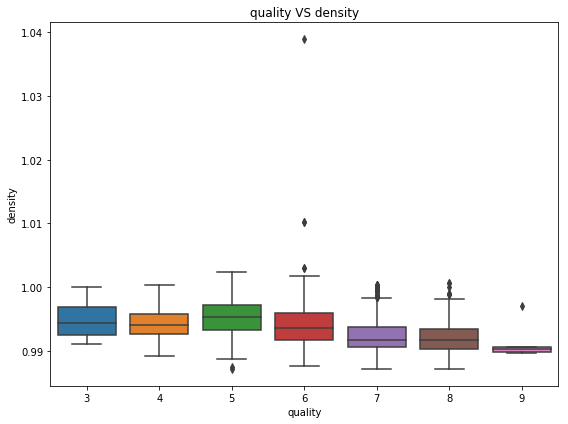

In [33]:
fig, axs = plt.subplots(ncols=1,figsize=(8,6))
sns.boxplot(x='quality', y='density', data=df_white, ax=axs)
plt.title('quality VS density')
plt.tight_layout()
plt.show()


Residual Sugar - The residual sugar across the quality ratings seem fairly flat.

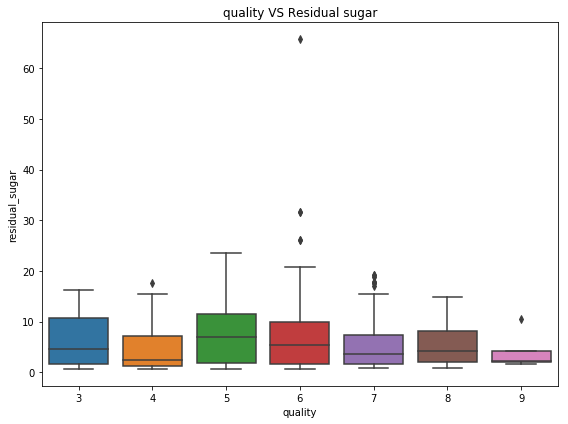

In [35]:
# Residual Sugar Vs Quality
fig, axs = plt.subplots(ncols=1,figsize=(8,6))
bx = sns.boxplot(x="quality", y='residual_sugar', data = df_white, ax=axs)
plt.title('quality VS Residual sugar')
plt.tight_layout()
plt.show()



total_sulphur_dioxide - total_sulphur_dioxide seems to be lower for quality = 4. We can also see that the total_sulphur_dioxide decreases( very small change) for quality ratings (6,7,8,9)

Text(0.5, 1.0, 'quality VS total_sulphur_dioxide')

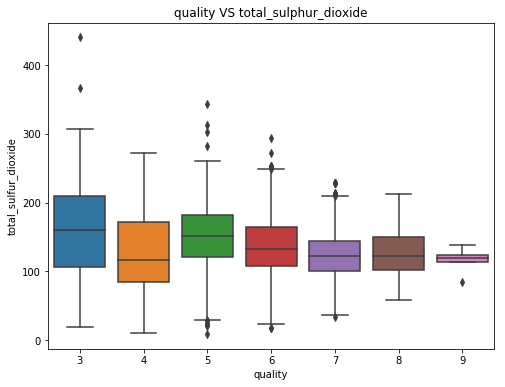

In [36]:
# Total Sulphurdioxide Vs quality
fig, axs = plt.subplots(ncols=1,figsize=(8,6))
bx = sns.boxplot(x="quality", y='total_sulfur_dioxide', data = df_white)
plt.title('quality VS total_sulphur_dioxide')


free_sulphur_dioxide - free_sulphur_dioxide seems to be lower for quality = 4. We can see there is no significant variation across the quality ratings.

Text(0.5, 1.0, 'quality vs Free sulphurdioxide')

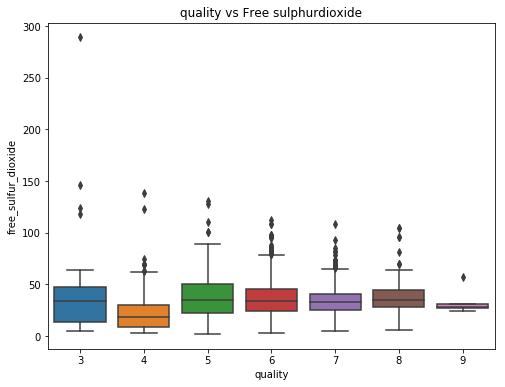

In [39]:
# Free Sulphurdioxide vs quality
fig, axs = plt.subplots(ncols=1,figsize=(8,6))
bx = sns.boxplot(x="quality", y='free_sulfur_dioxide', data = df_white)
plt.title('quality vs Free sulphurdioxide')

sulphates -  We can see there is no significant variation across the quality ratings.

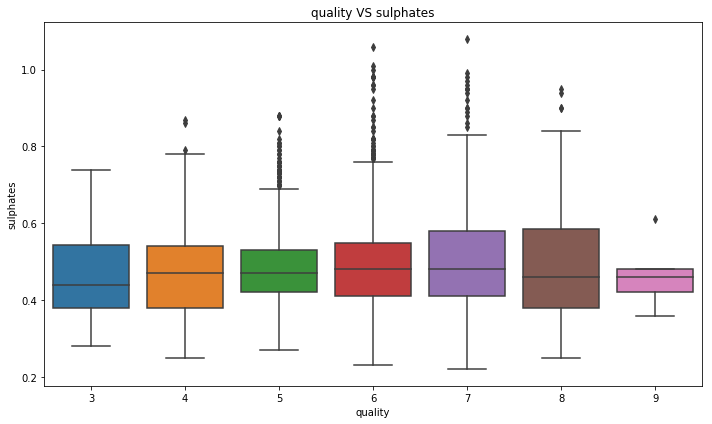

In [41]:
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.boxplot(x='quality', y='sulphates', data=df_white, ax=axs)
plt.title('quality VS sulphates')
plt.tight_layout()
plt.show()

volatile acidity - we can see that the volatile acidity is sllightly high for quality = 4. We can see there is no significant variation across the quality ratings.




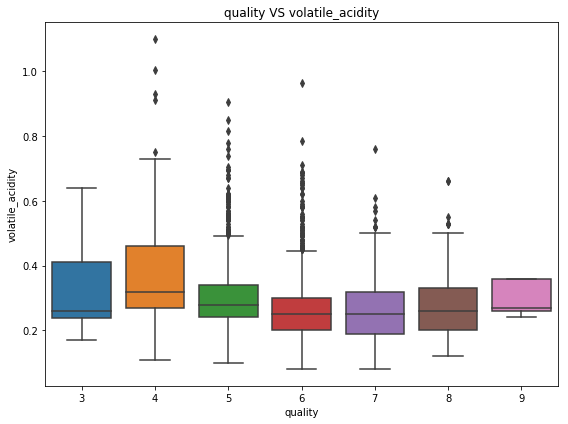

In [40]:
fig, axs = plt.subplots(ncols=1,figsize=(8,6))
sns.boxplot(x='quality', y='volatile_acidity', data=df_white, ax=axs)
plt.title('quality VS volatile_acidity')
plt.tight_layout()
plt.show()

citric acid - We can see there is no significant variation across the quality ratings.


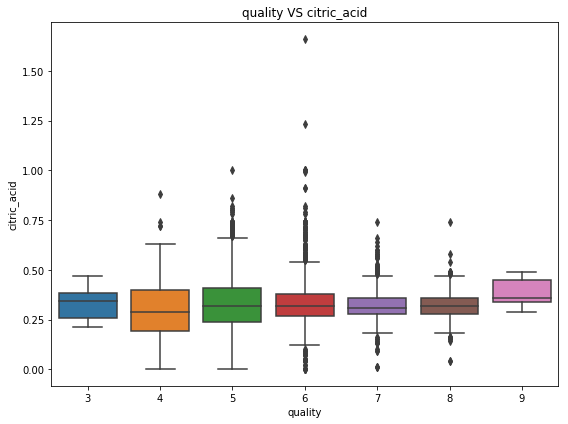

In [42]:
fig, axs = plt.subplots(ncols=1,figsize=(8,6))
sns.boxplot(x='quality', y='citric_acid', data=df_white, ax=axs)
plt.title('quality VS citric_acid')
plt.tight_layout()
plt.show()

pH - We can see there is no significant variation across the quality ratings.


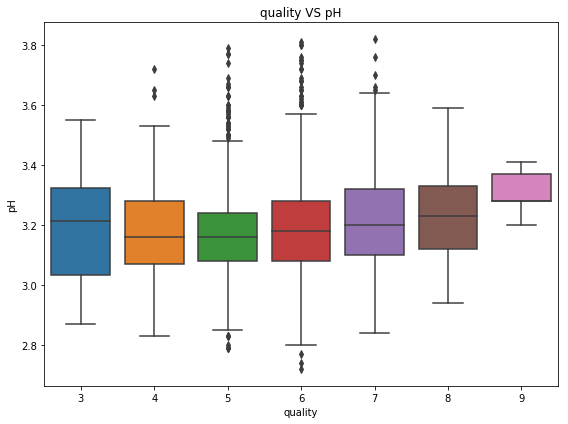

In [44]:
fig, axs = plt.subplots(ncols=1,figsize=(8,6))
sns.boxplot(x='quality', y='pH', data=df_white,ax=axs)
plt.title('quality VS pH')
plt.tight_layout()
plt.show()

**CONCLUSION :**

DATASET has  **4898  observations with 12 different variables**. 11 are feature variables and 1 target variable (quality)

**Count plot on quality ( target variable )** - We can see the dataset has values 3,4,5,6,7,8,9. We can see we do not have any observations for  1,2 and 10 in our dataset.Count plot shows how our observations are distributed for our quality ratings. It is also noted that there are very few observations for quality rating 3 and 9. And majority of the observations are of average quality ( ratings 5 and 6)


**OUTLIERS** - We can see that the residual_sugar, free_sulphur_dioxide , total_sulphur_dioxide have outliers ( Huge difference between 75 percentile and max value. This could be easily visualised using box plots/scatter plots.)

 **Residual Sugar** - We can see that there are very few outliers and there is one significantly far away ( quality - 6 )
 
 **free_sulpur_dioxide** - We can see that there is one value which is significantly far away for quality = 3

 **total_sulpur_dioxide** - We can see that there is one value which is significantly far away for quality = 3.

**FACTORS THAT AFFECT QUALITY OF WINE** -  We can see alcohol content is higher for good quality of wines . It can also be noted that the density decreases as the quality of the white wine increases. 

It is also observed that pH, volatile acidity, citric acid, sulphates, total sulphur di oxide, free sulphur di oxide have flatter values across different quality of wines.



